In [76]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pmdarima


In [ ]:
df=pd.read_csv('003.csv')
print(df.columns)
df['Dividends'].mean()
count=0
for i in range(len(df['Dividends'])):
    if df['Dividends'][i]!=0:
        print(i)
        # pass


C:\Users\risha\AppData\Local\Temp\ipykernel_15308\243246686.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, df['Close'], df['Dividends'], cmap='viridis')


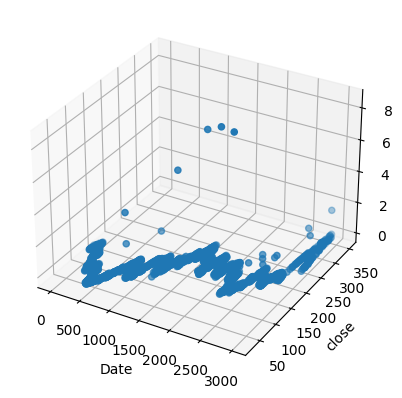

In [78]:
x=[]
for i in range(len(df['Close'])):
    x.append(i)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# df['Date'] = df['Date'].astype('Date').cat.codes

# Plot the surface
ax.scatter(x, df['Close'], df['Dividends'], cmap='viridis')

# Customize labels
ax.set_xlabel('Date')
ax.set_ylabel('close')
ax.set_zlabel('dividends')

# Show the plot
plt.show()

C:\Users\risha\AppData\Local\Temp\ipykernel_15308\2980839964.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat=df.corr()


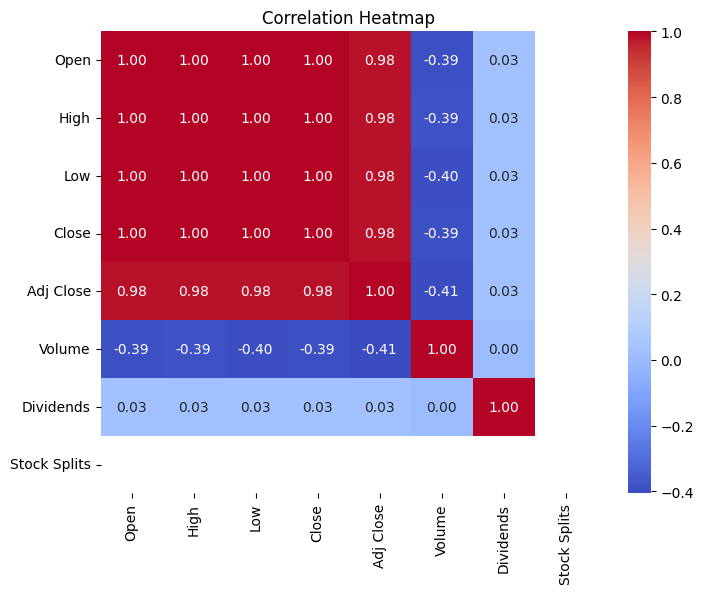

In [84]:
correlation_mat=df.corr()
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

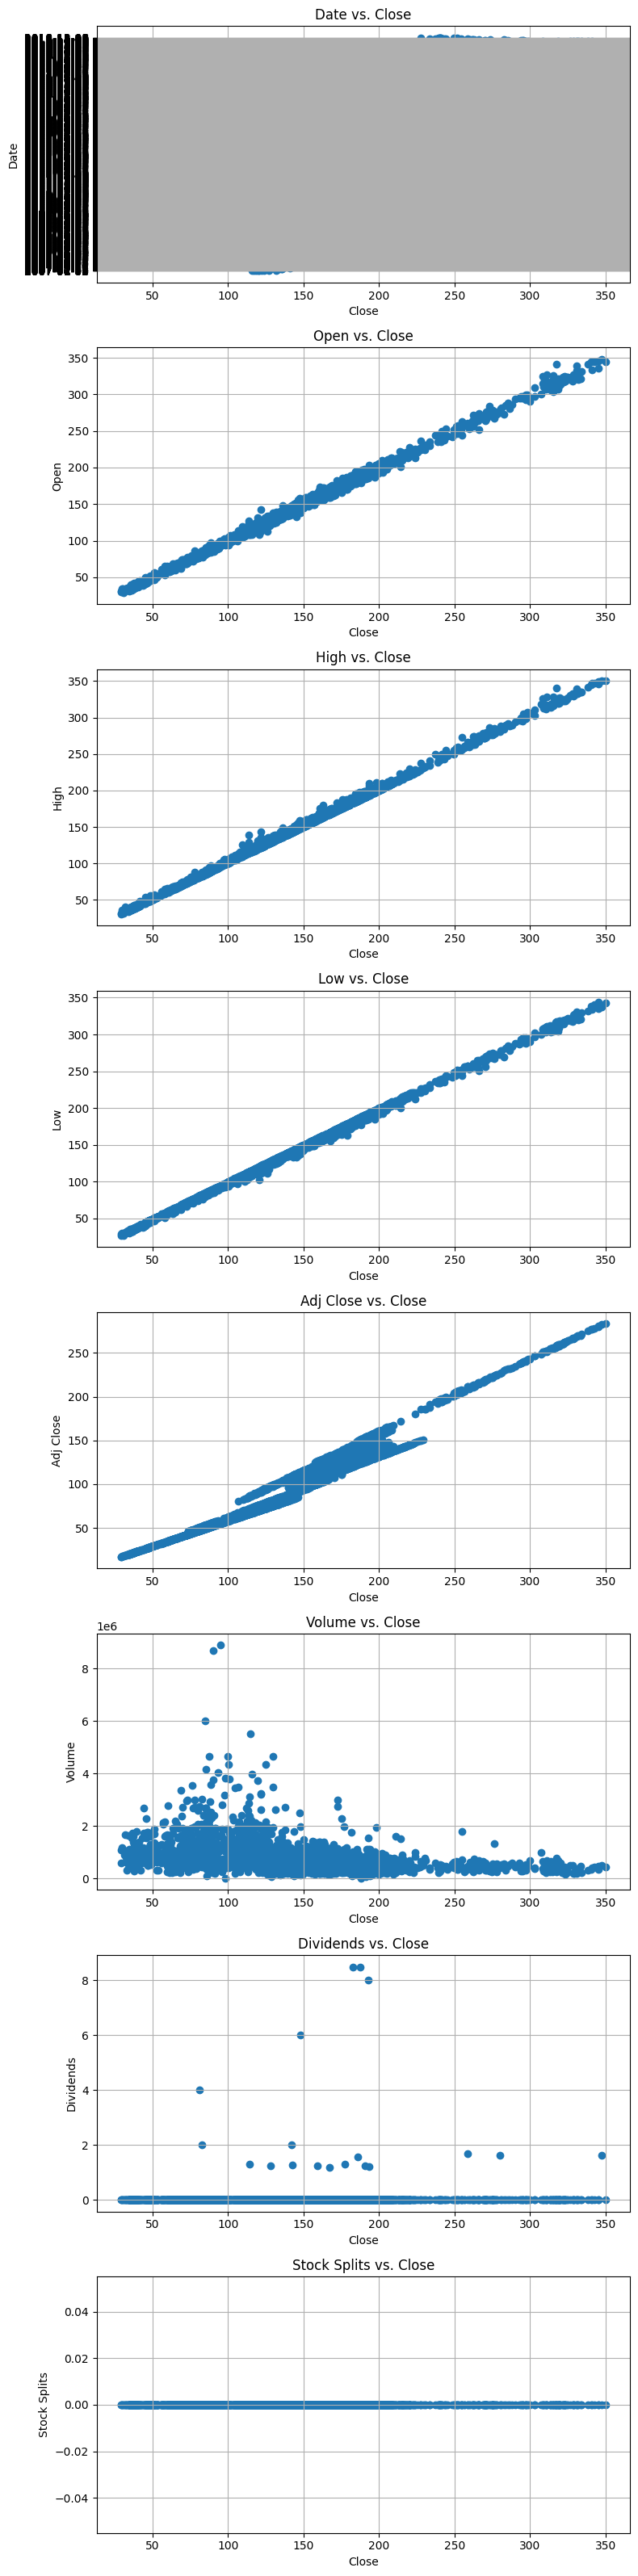

In [74]:
x_column = 'Close'  # Change this to the column you want as the x-axis
y_columns = [col for col in df.columns if col != x_column]

# Create subplots for each y-column
num_subplots = len(y_columns)
fig, axes = plt.subplots(num_subplots, 1, figsize=(8, 4*num_subplots))
for i, column in enumerate(y_columns):
    axes[i].scatter(df[x_column], df[column])
    axes[i].set_xlabel(x_column)
    axes[i].set_ylabel(column)
    axes[i].set_title(f"{column} vs. {x_column}")
    axes[i].grid(True)
plt.tight_layout()
plt.show()

In [85]:
import seaborn as sns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

<Axes: >

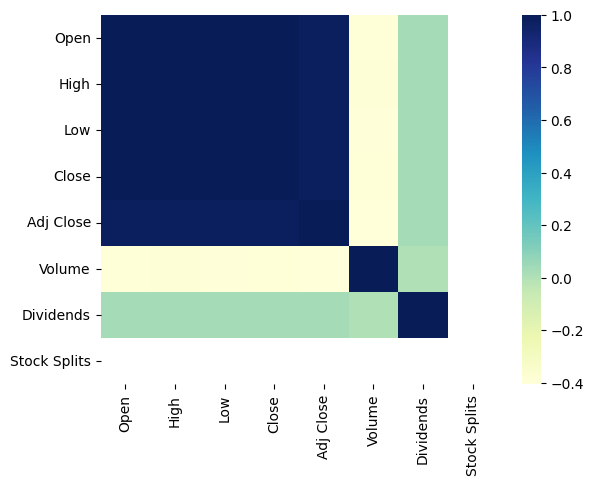

In [86]:
df_corr=df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits']]
sns.heatmap((df_corr.corr(numeric_only=False)),cmap="YlGnBu")

Explained Variance Ratios: [0.99287892]
Principal Components: [[0.50104104 0.50118812 0.50107093 0.49668528]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


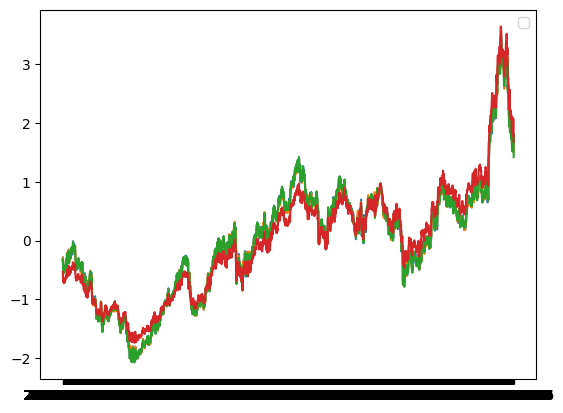

In [87]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

df_pca=df[['Open', 'High', 'Low','Adj Close']]

scaler=StandardScaler()
X_scaled = scaler.fit_transform(df_pca)
pca = PCA(n_components=1)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)
principal_components = pca.components_
print("Principal Components:", principal_components)

plt.plot(df['Date'],X_scaled)
plt.legend()
plt.show()

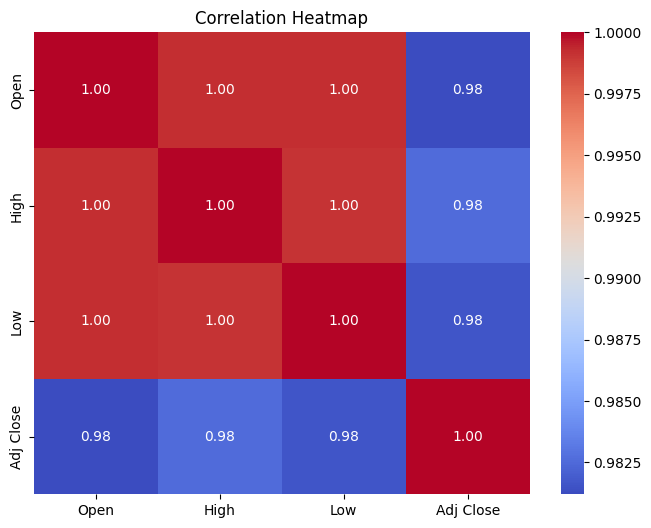

In [88]:
corr_mat=df_pca.corr()
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()